## Explorating the Tree of Life

<table><tr><td>
<img src="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391" width=200><a href="https://i.guim.co.uk/img/static/sys-images/Guardian/Pix/pictures/2008/04/17/DarwinSketch.article.jpg?width=445&quality=85&auto=format&fit=max&s=c7f89552d12b8495b2b4eb4d7a5bc391">source</a></td><td><img src="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png" width=300><a href="http://www.greennature.ca/greennature/taxonomy/tree_of_life.png">source</a></td></tr></table>

In this hands-on exercise, you answer the following questions by using pandas data structures and methods to analyze the eukaryote genome data store in the following tab-delimited file. https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv

In [7]:
import pandas as pd
%matplotlib inline

# this input file is tab-delimited instead of comma-delimited
tsvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/euk.tsv"
# Load the csv file into a dataframe
euk = pd.read_csv(tsvFile, sep="\t")
euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi CCMP1516,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


## Q1. How many Mammals have at least 20,000 genes? What are their scientific names?
*Note:*
- *Mammals are under Class*
- *Scientific names are under Species*


In [10]:
# Your code here . . .
euk['Number of genes'] = pd.to_numeric(euk['Number of genes'], errors= 'coerce')
q1_euk = euk.loc[:, ['Species', 'Class', 'Number of genes']]
q1_euk = q1_euk[(q1_euk['Number of genes'] >= 20000) & (q1_euk['Class'] == 'Mammals')]
q1_euk
#there are 134 mammals with atleast 20,000 genes.

,Species,Class,Number of genes
44,Homo sapiens,Mammals,60679.0
45,Mus musculus,Mammals,48701.0
65,Rattus norvegicus,Mammals,39365.0
70,Felis catus,Mammals,35234.0
74,Bos taurus,Mammals,34966.0
...,...,...,...
4977,Rattus norvegicus,Mammals,36373.0
5087,Macaca mulatta,Mammals,21524.0
5152,Macaca fascicularis,Mammals,21132.0
5180,Cricetulus griseus,Mammals,32567.0


### Q2. Animals are a part of Kingdom. How many records are there for each Class of Animals?

In [34]:
# Your code here . . .
q2_euk = euk[euk['Kingdom'] == 'Animals']
q2_euk = q2_euk.loc[:, ['Class', 'Kingdom']].groupby('Class').count()
q2_euk

,Kingdom
Class,
Amphibians,7
Birds,172
Fishes,282
Flatworms,47
Insects,602
Mammals,658
Other Animals,210
Reptiles,41
Roundworms,162


### Q3. Animals are a part of Kingdom. How many unique Species are there for each Class of Animals?

In [36]:
# Your code here . . .
q3_euk = euk[euk['Kingdom'] == 'Animals']
q3_euk = q3_euk.loc[:, ['Class', 'Species']].groupby('Class').nunique()
q3_euk

,Species
Class,
Amphibians,6
Birds,144
Fishes,218
Flatworms,34
Insects,402
Mammals,313
Other Animals,171
Reptiles,38
Roundworms,116


### Q4. What are the unique scientific names of Mammals with the genus name Macaca?
*Recall: the scientific name starts with genus followed by a space and then the species name. Example: Homo sapiens, where Homo is the genus name and sapiens is the species name.*

In [267]:
# Your code here . . .
q4_euk = euk[euk.Species.str.split(' ').str[0] == 'Macaca']
q4_euk.loc[:, ['Genus']] = q4_euk.Species.str.split(' ').str[0]
q4_euk = q4_euk.loc[:, ['Species', 'Class']].drop_duplicates()
q4_euk

,Species,Class
119,Macaca mulatta,Mammals
306,Macaca fascicularis,Mammals
1116,Macaca nemestrina,Mammals
1845,Macaca fuscata fuscata,Mammals


### Q5. Modify the Species names to only contain the scientific names  and create a new dataframe.

Some of the names in the Species column have more than two parts, such as `Emiliania huxleyi CCMP1516`. Create a new column `Species` that contains only the first two parts of name, such as `Emiliania huxleyi`. Combine this new Species column with `Kingdom`, `Class`, `Size (Mb)`, `Number of genes`, and `Number of proteins` and store this new dataframe as `df_species`.

Hint: Follow Q3 in Lecture 4 with a little twist. Instead of just getting the first element from the split results, you will get the first two elements using `.str[0:2]` which will give you a list. You can then use `.str.join(" ")` to change it back to a string.

In [372]:
# Your code here . . 
q5_euk = euk.loc[:]
q5_euk['Species'] = q5_euk.Species.str.split(' ').str[:2].str.join(' ')

q5_euk

,Species,Kingdom,Class,Size (Mb),GC%,Number of genes,Number of proteins,Publication year,Assembly status
0,Emiliania huxleyi,Protists,Other Protists,167.676000,64.5,38549,38554,2013,Scaffold
1,Arabidopsis thaliana,Plants,Land Plants,119.669000,36.0529,38311,48265,2001,Chromosome
2,Glycine max,Plants,Land Plants,979.046000,35.1153,59847,71219,2010,Chromosome
3,Medicago truncatula,Plants,Land Plants,412.924000,34.047,37603,41939,2011,Chromosome
4,Solanum lycopersicum,Plants,Land Plants,828.349000,35.6991,31200,37660,2010,Chromosome
...,...,...,...,...,...,...,...,...,...
8297,Saccharomyces cerevisiae,Fungi,Ascomycetes,3.993920,38.2,-,-,2017,Scaffold
8298,Saccharomyces cerevisiae,Fungi,Ascomycetes,0.586761,38.5921,155,298,1992,Chromosome
8299,Saccharomyces cerevisiae,Fungi,Ascomycetes,12.020400,38.2971,-,-,2018,Chromosome
8300,Saccharomyces cerevisiae,Fungi,Ascomycetes,11.960900,38.2413,-,-,2018,Chromosome


### Q6. Create a pie plot using pandas to show the number of unique Species in each Class of Animals using the new dataframe you created in Q5
Hint: First, create a new dataframe that contains the number of unique Species and the index is the corresponding Animals Class. Then, use that dataframe to plot the pie plot.
[Check out this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

In [390]:
# Create a new dataframe that contains the number of unique Species and
# the index is the corresponding Animals Class.

# Your code here . . .
q6_euk = euk.loc[:, ['Class', 'Species']].groupby('Class').nunique()

q6_euk

,Species
Class,
Amphibians,6
Apicomplexans,131
Ascomycetes,1859
Basidiomycetes,523
Birds,144
Fishes,218
Flatworms,34
Green Algae,76
Insects,402


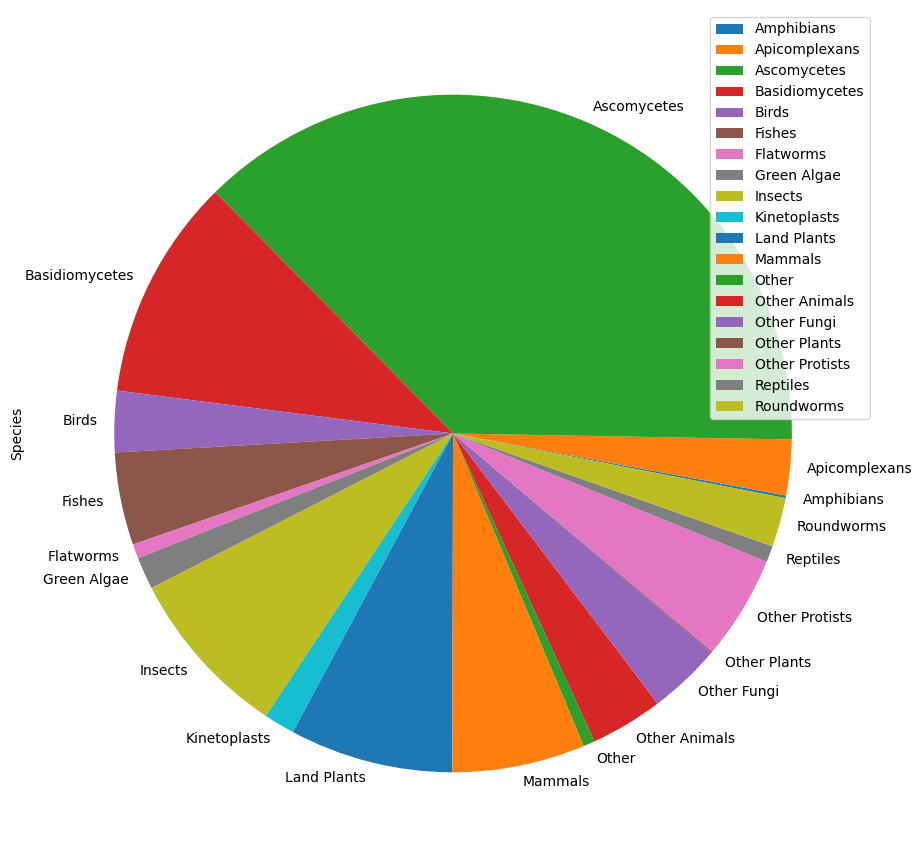

In [563]:
# Create a panda pie plot using the dataframe above

# Your code here . . .
q6_euk.plot.pie(y = 'Species', figsize = (15,11), labeldistance = 1.05, startangle = -11 ).legend(loc = 'upper right')